In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
def load_data(filepath):
    """
    Load data from a CSV file using UTF-8 encoding, with fallback to ISO-8859-1 if needed.
    """
    try:
        data = pd.read_csv(filepath, encoding='utf-8')
        print(f"Data from {filepath} loaded successfully with UTF-8 encoding.")
    except UnicodeDecodeError:
        data = pd.read_csv(filepath, encoding='ISO-8859-1')
        print(f"Data from {filepath} loaded successfully with ISO-8859-1 encoding due to UTF-8 failure.")
    return data

In [41]:
def explore_data(data, filepath):
    """
    Explore data by printing its basic properties.
    """
    print(f"\nExploring data from {filepath}:")
    print("Shape of the data:", data.shape)
    print("Data Types:\n", data.dtypes)
    print("Missing values per column:\n", data.isnull().sum())
    print("First 10 rows of data:\n", data.head(10))

In [42]:
def clean_data(data):
    """
    Clean data by handling missing values with forward fill.
    """
    data.fillna(method='ffill', inplace=True)
    print("Data cleaned using forward fill for missing values.")
    return data

In [43]:
# List of file paths to the datasets
filepaths = [
    'acorn_details.csv',
    'informations_households.csv',
    'uk_bank_holidays.csv',
    'weather_daily_darksky.csv',
    'weather_hourly_darksky.csv'
]

In [44]:
datasets = {}
for filepath in filepaths:
    data = load_data(filepath)
    explore_data(data, filepath)
    cleaned_data = clean_data(data)
    datasets[filepath] = cleaned_data



Data from acorn_details.csv loaded successfully with ISO-8859-1 encoding due to UTF-8 failure.

Exploring data from acorn_details.csv:
Shape of the data: (826, 20)
Data Types:
 MAIN CATEGORIES     object
CATEGORIES          object
REFERENCE           object
ACORN-A            float64
ACORN-B            float64
ACORN-C            float64
ACORN-D            float64
ACORN-E            float64
ACORN-F            float64
ACORN-G            float64
ACORN-H            float64
ACORN-I            float64
ACORN-J            float64
ACORN-K            float64
ACORN-L            float64
ACORN-M            float64
ACORN-N            float64
ACORN-O            float64
ACORN-P            float64
ACORN-Q            float64
dtype: object
Missing values per column:
 MAIN CATEGORIES    0
CATEGORIES         0
REFERENCE          1
ACORN-A            0
ACORN-B            0
ACORN-C            0
ACORN-D            0
ACORN-E            0
ACORN-F            0
ACORN-G            0
ACORN-H            0
ACORN-I   

In [45]:
def summary_statistics(data):
    """
    Print summary statistics for numerical columns in the DataFrame.
    """
    print("\nSummary Statistics:\n", data.describe())

In [46]:
# Histograms for numeric columns plotted vertically
def plot_histograms(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    if num_cols > 0:
        fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 5 * num_cols))  # Adjust the figure size as necessary
        fig.tight_layout(pad=3.0)  # Add space between plots

        if num_cols == 1:  # If there's only one numeric column, wrap it in a list to make iterable
            axes = [axes]

        for ax, col in zip(axes, numeric_cols):
            ax.hist(data[col], bins=15, color='blue', alpha=0.7)
            ax.set_title(f'Histogram of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

        plt.show()
    else:
        print("No numeric columns available for histogram plotting.")

In [47]:
# Boxplots for numeric columns
def plot_boxplots(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [48]:
# Correlation Matrix
def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()



Exploratory Data Analysis for acorn_details.csv:

Summary Statistics:
            ACORN-A     ACORN-B     ACORN-C      ACORN-D     ACORN-E  \
count   826.000000  826.000000  826.000000   826.000000  826.000000   
mean    131.313495  110.860256  100.080789   136.857507  117.894757   
std     201.448212   42.464050   30.099529    97.740794   35.768807   
min      12.000000    0.957011    0.281968     2.000000   21.000000   
25%      87.000000   94.000000   86.000000    93.092150   99.000000   
50%     104.000000  107.000000  100.000000   121.000000  117.000000   
75%     128.000000  122.000000  113.000000   154.000000  135.000000   
max    3795.000000  419.000000  272.000000  1159.034650  286.000000   

          ACORN-F     ACORN-G     ACORN-H     ACORN-I     ACORN-J  \
count  826.000000  826.000000  826.000000  826.000000  826.000000   
mean    95.574535  101.444276   97.298915   87.028545  104.216563   
std     33.636661   21.798994   18.229234   30.337794   19.924033   
min      0.0

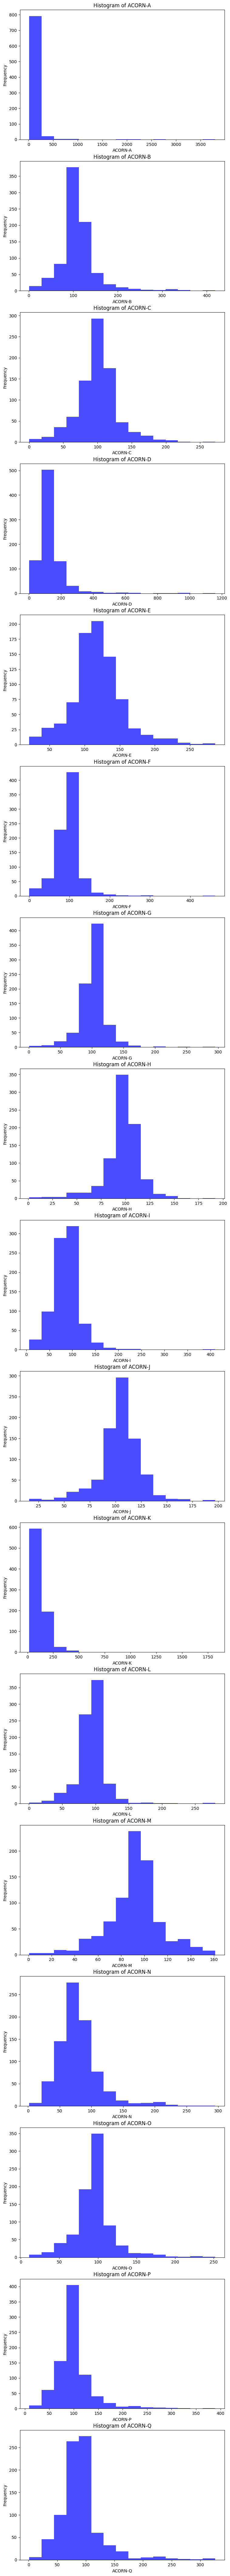

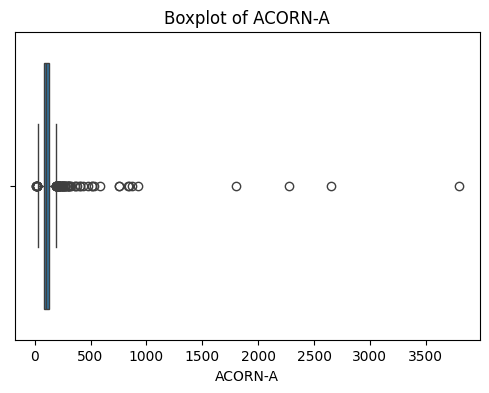

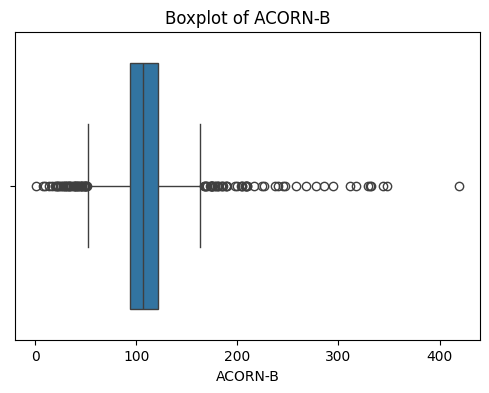

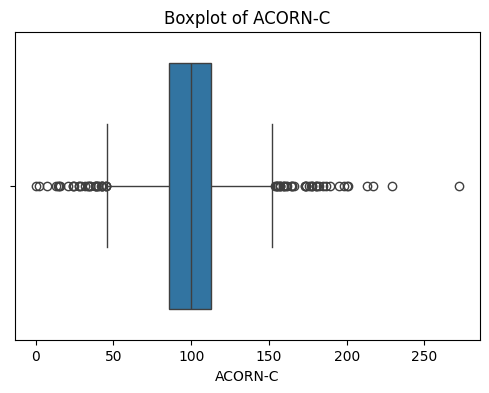

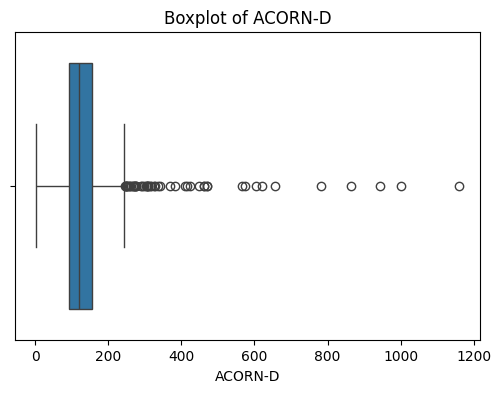

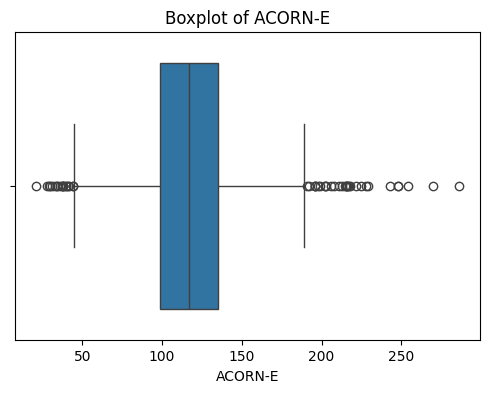

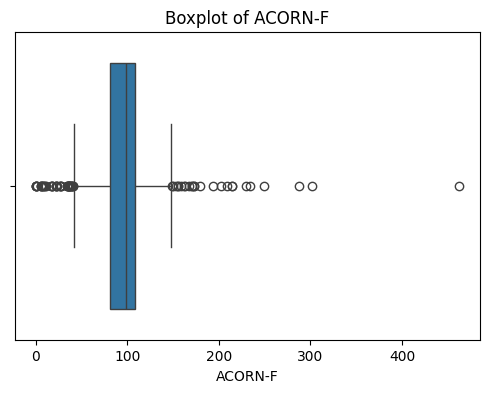

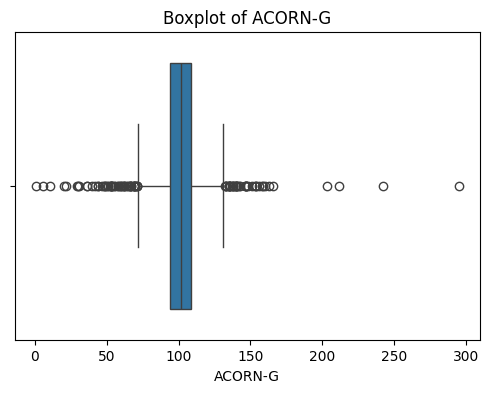

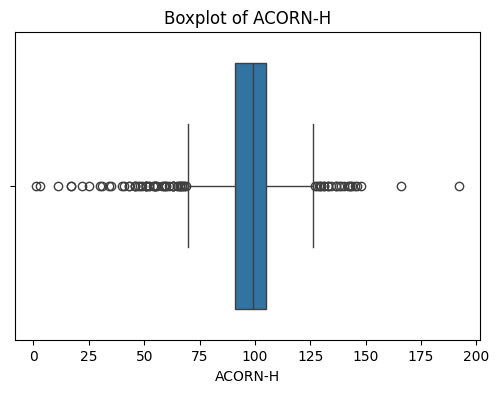

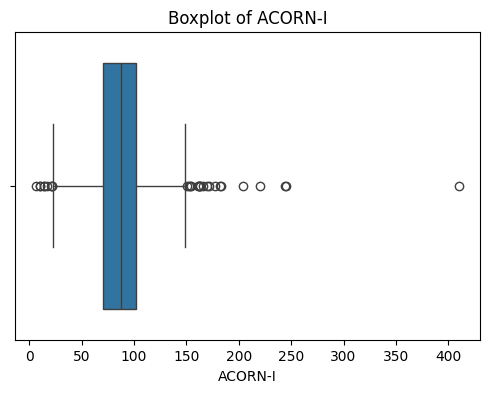

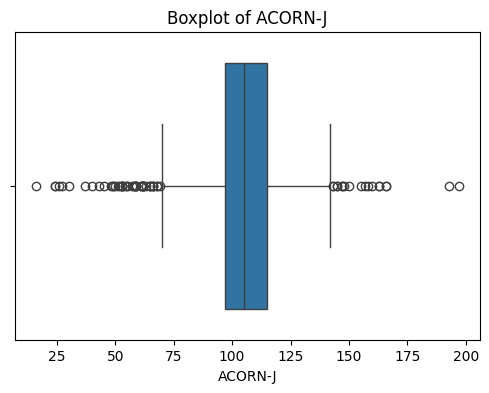

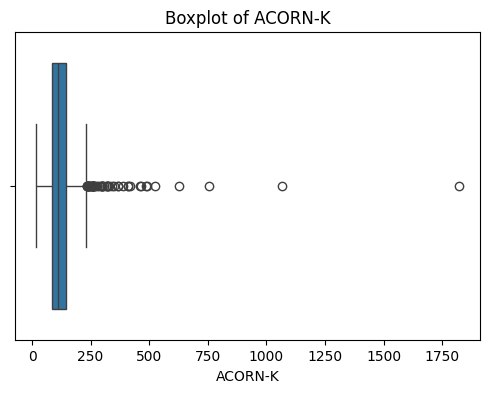

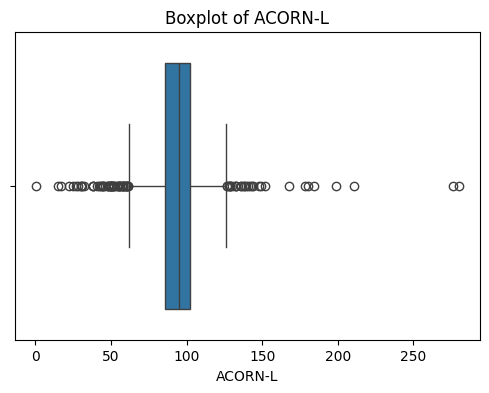

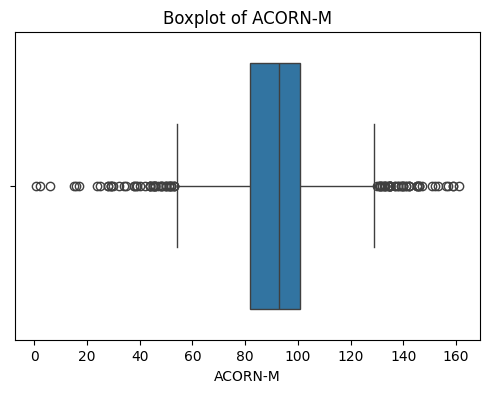

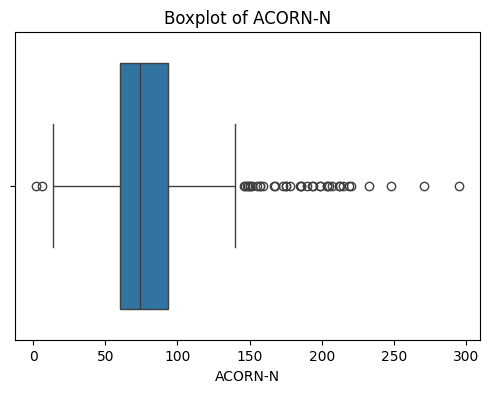

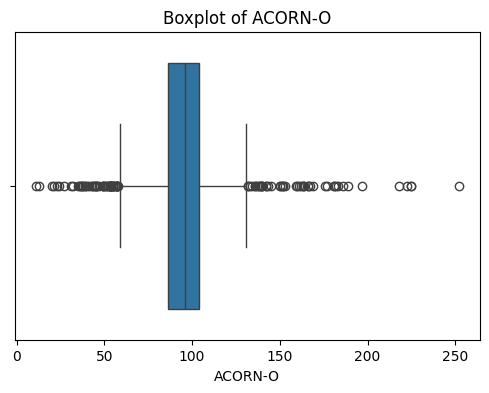

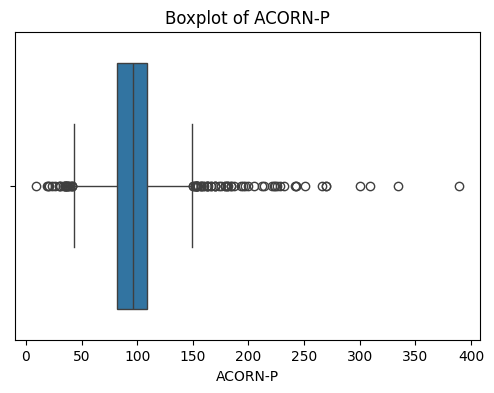

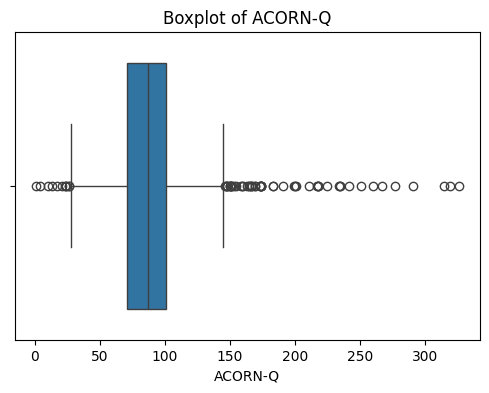


Exploratory Data Analysis for informations_households.csv:

Summary Statistics:
             LCLid stdorToU    Acorn Acorn_grouped     file
count        5566     5566     5566          5566     5566
unique       5566        2       19             5      112
top     MAC005492      Std  ACORN-E      Affluent  block_0
freq            1     4443     1567          2192       50

Exploratory Data Analysis for uk_bank_holidays.csv:

Summary Statistics:
        Bank holidays        Type
count             25          25
unique            25          11
top       2012-12-26  Boxing Day
freq               1           3

Exploratory Data Analysis for weather_daily_darksky.csv:

Summary Statistics:
        temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      882.000000   882.000000  882.000000  882.000000  882.000000   
mean        13.660113   195.702948    6.530034    0.477755    3.581803   
std          6.182744    89.340783    4.830875    0.193455    1.694007   
min    

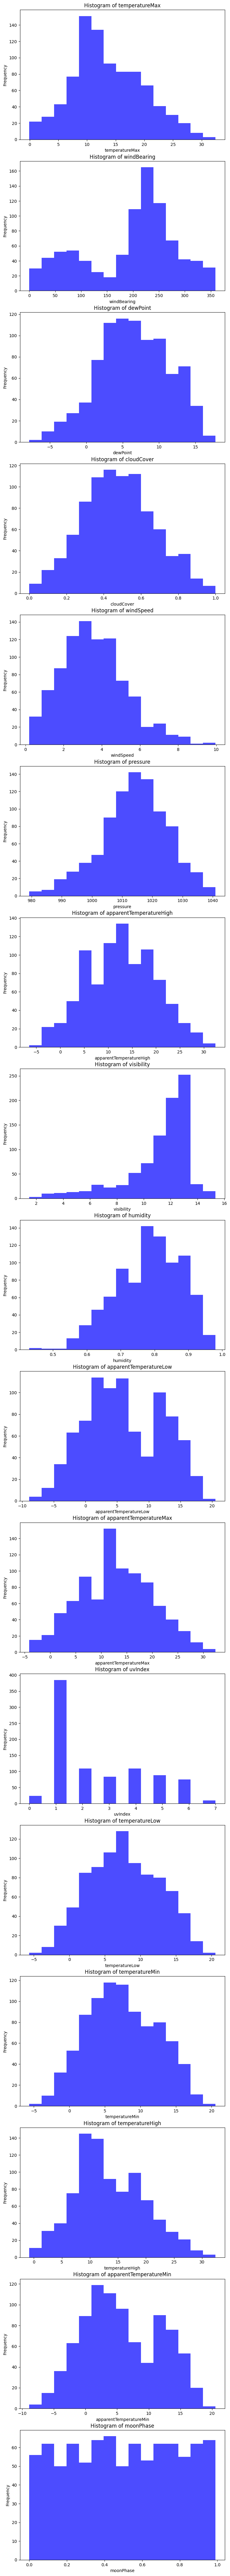

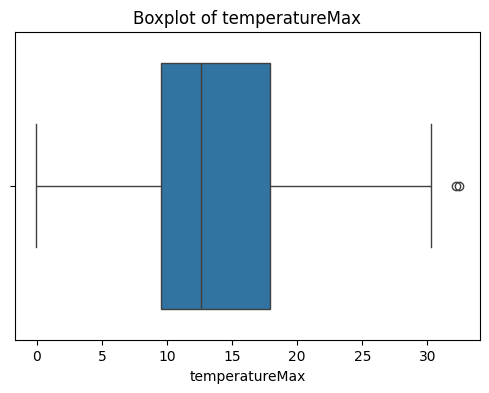

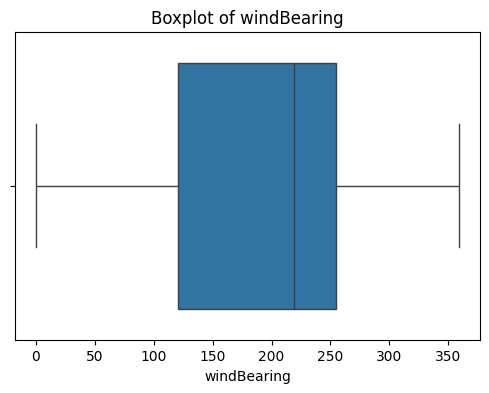

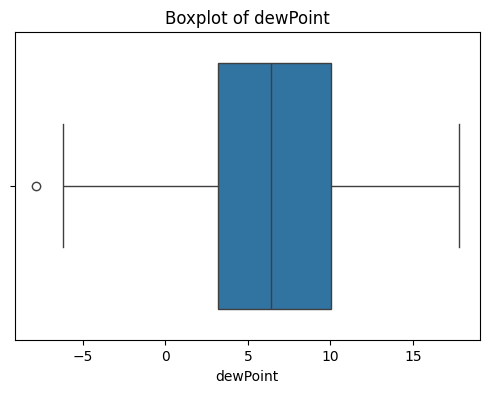

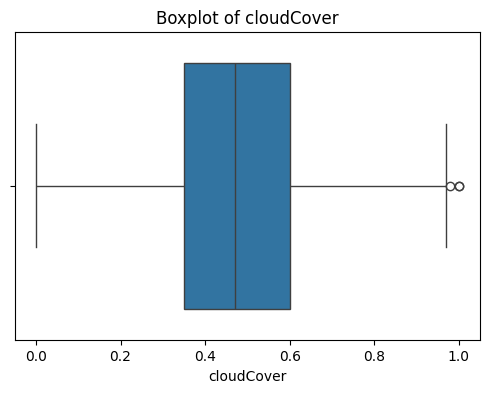

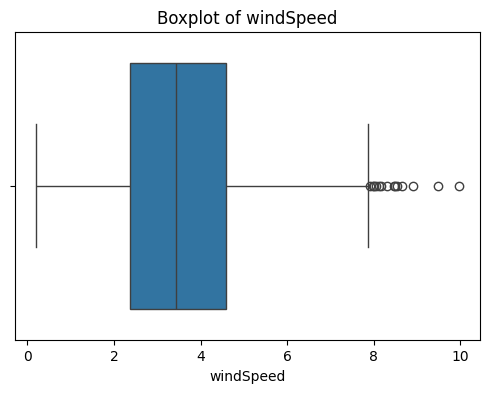

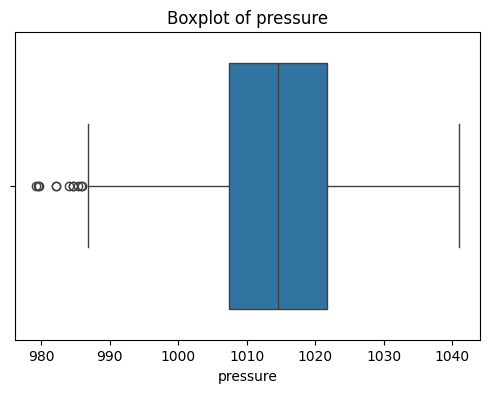

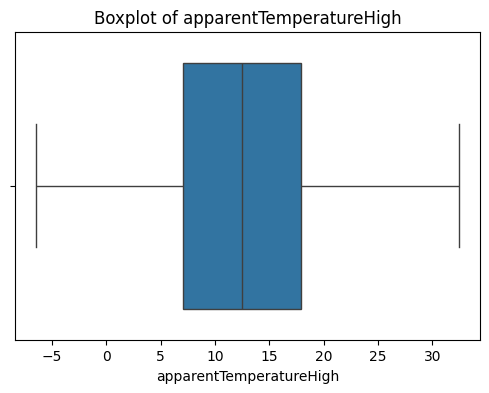

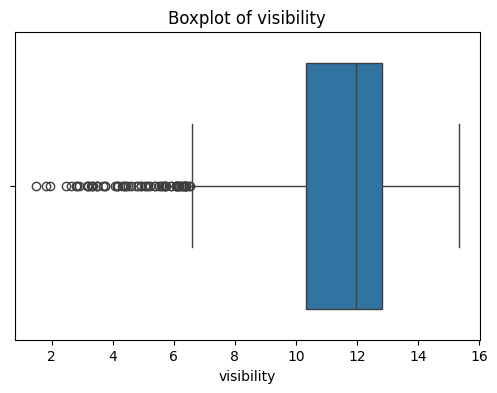

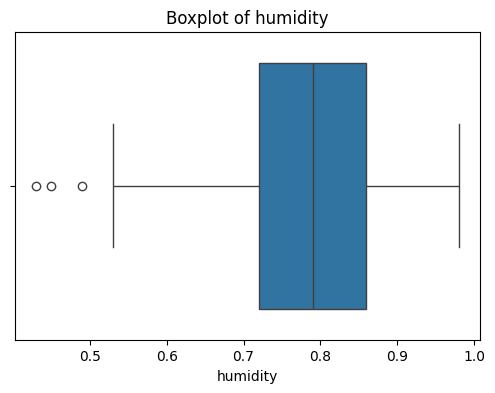

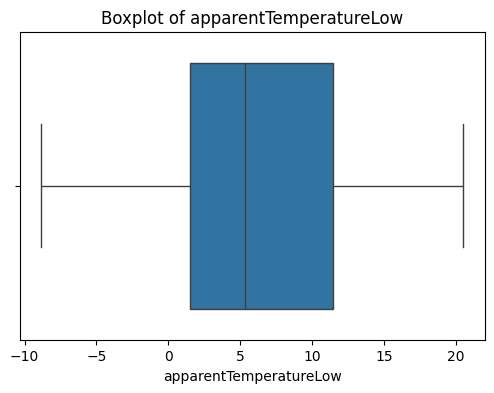

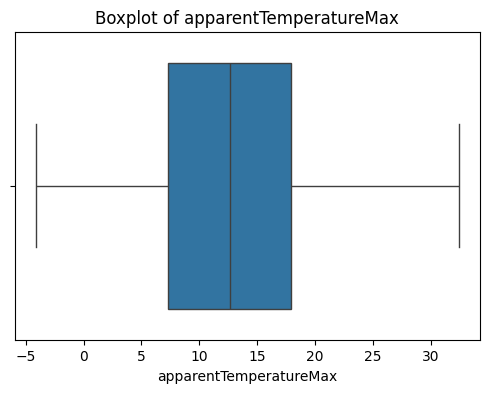

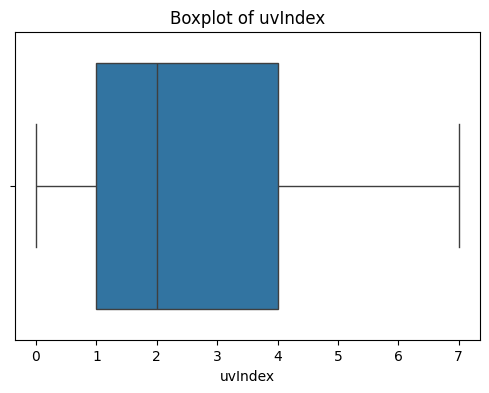

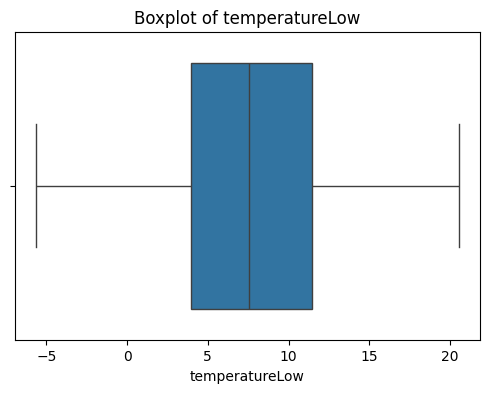

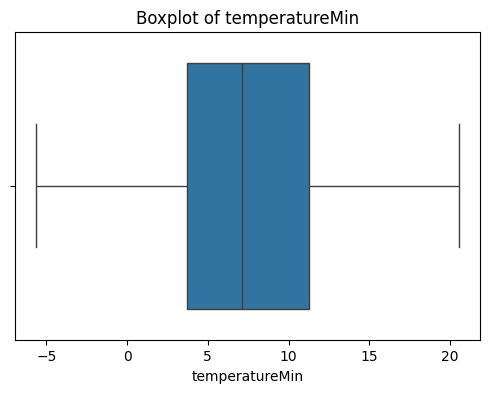

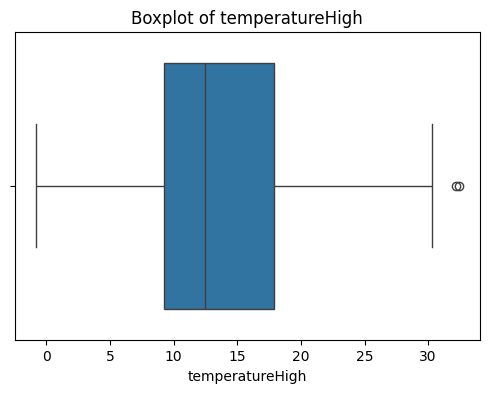

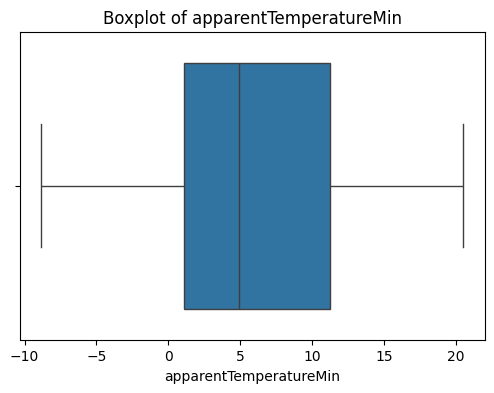

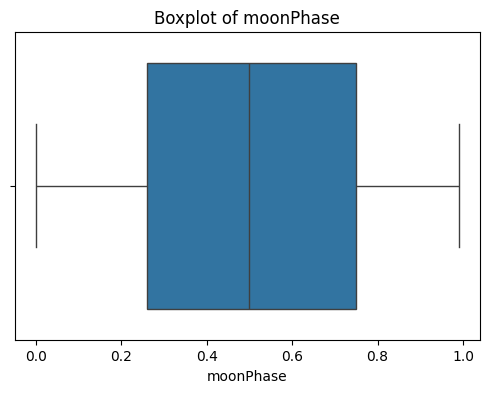


Exploratory Data Analysis for weather_hourly_darksky.csv:

Summary Statistics:
          visibility   windBearing   temperature      dewPoint      pressure  \
count  21165.000000  21165.000000  21165.000000  21165.000000  21165.000000   
mean      11.166485    195.685897     10.471486      6.530501   1014.123268   
std        3.099337     90.629453      5.781904      5.041965     11.387874   
min        0.180000      0.000000     -5.640000     -9.980000    975.740000   
25%       10.120000    121.000000      6.470000      2.820000   1007.430000   
50%       12.260000    217.000000      9.930000      6.570000   1014.780000   
75%       13.080000    256.000000     14.310000     10.330000   1022.050000   
max       16.090000    359.000000     32.400000     19.880000   1043.320000   

       apparentTemperature     windSpeed      humidity  
count         21165.000000  21165.000000  21165.000000  
mean              9.230338      3.905215      0.781829  
std               6.940919      2.02

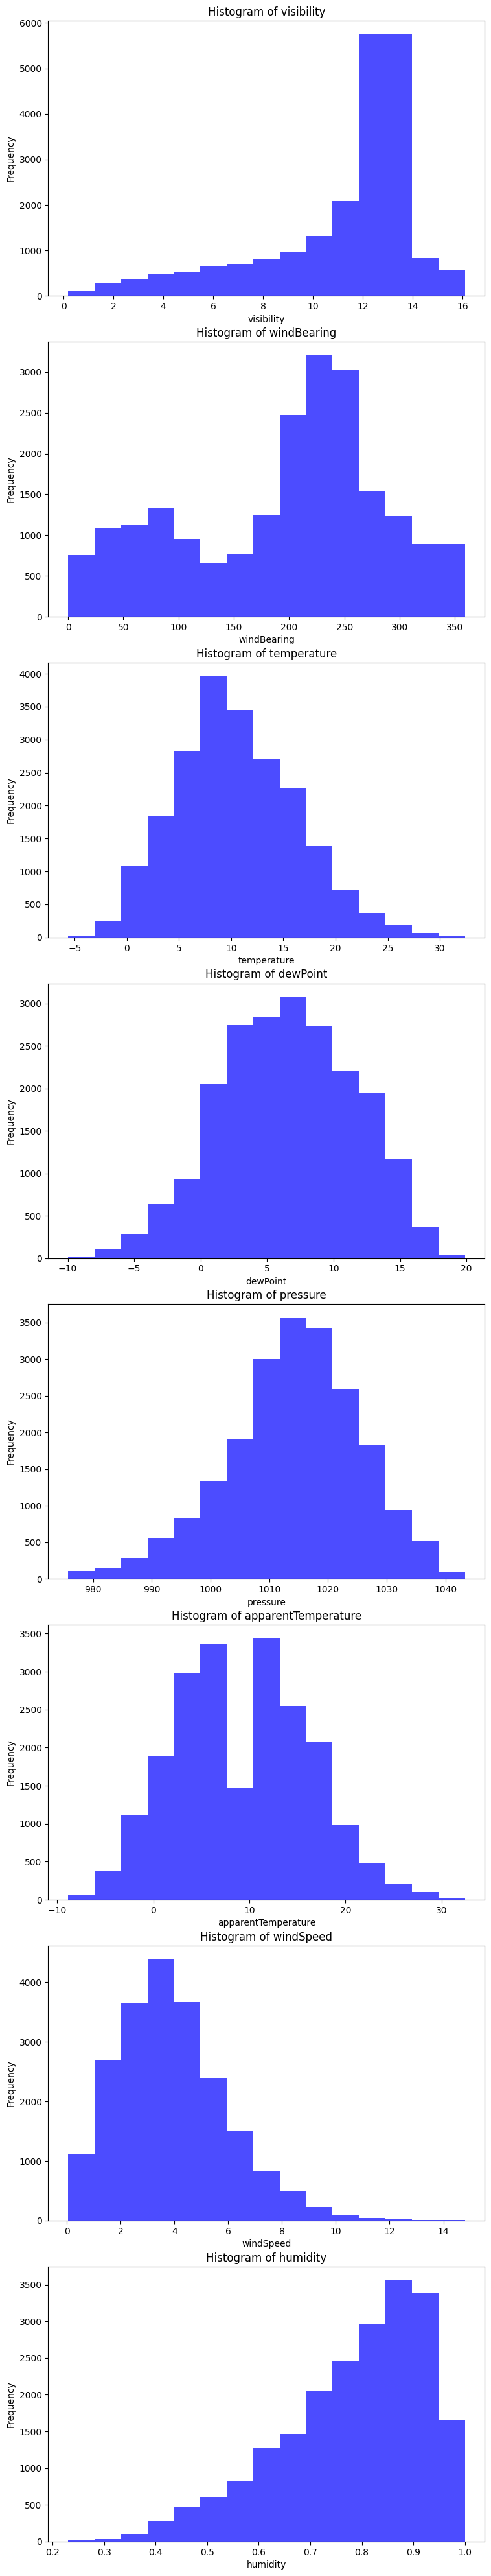

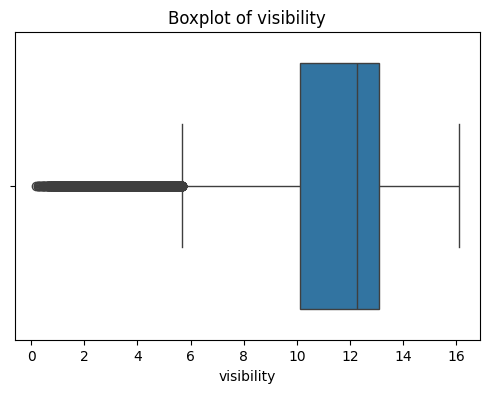

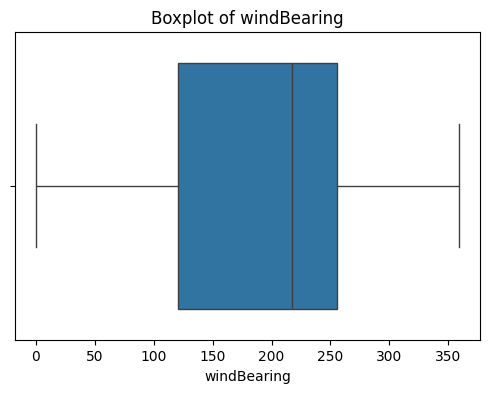

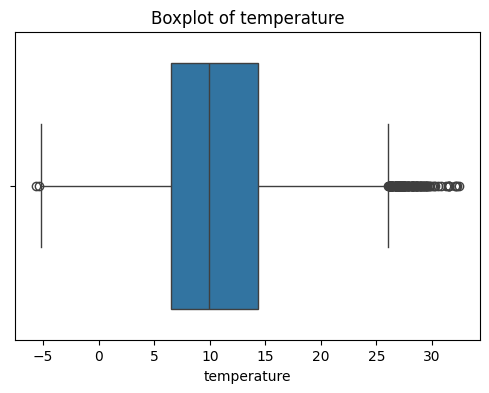

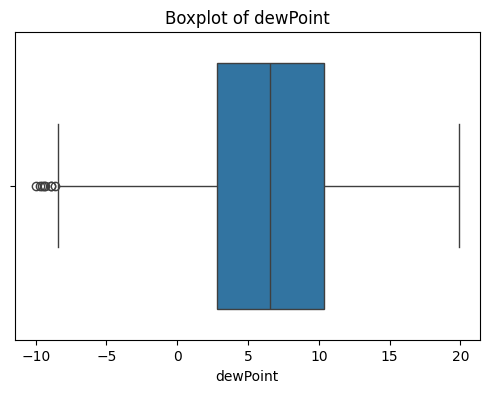

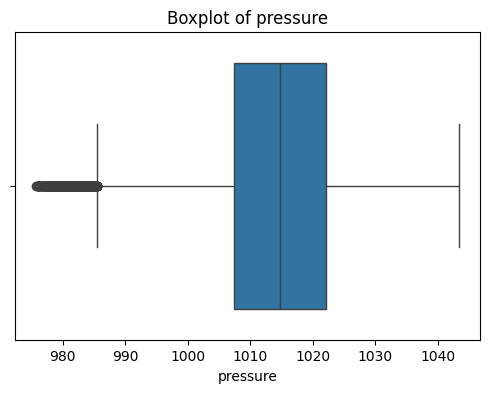

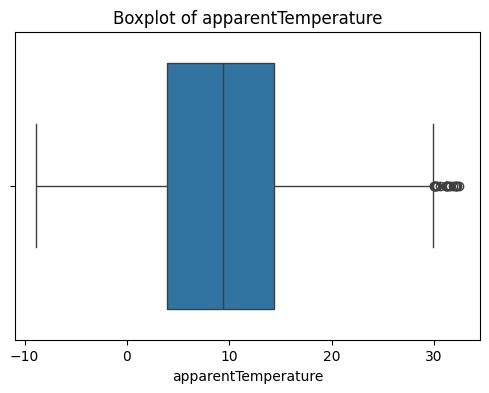

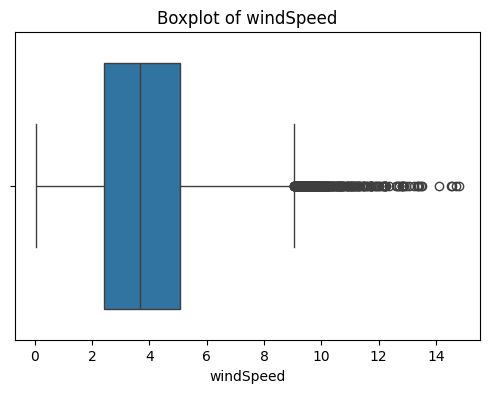

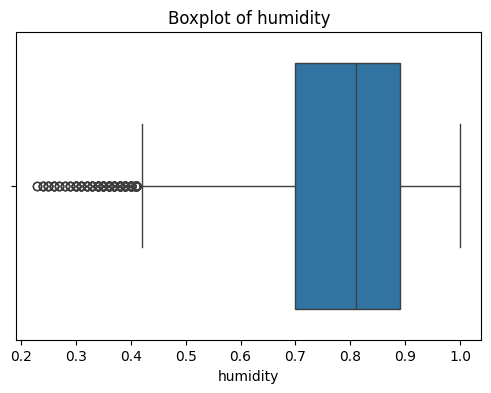

In [49]:
# For EDA
# 'datasets' is a dictionary containing the DataFrames
for name, data in datasets.items():
    print(f"\nExploratory Data Analysis for {name}:")
    # Summary for numeric columns
    summary_statistics(data)

    # Check if there are numeric columns
    if data.select_dtypes(include=[np.number]).shape[1] > 0:
        plot_histograms(data)
        plot_boxplots(data)

